In [1]:
import os
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#os.environ['CUDA_VISIBLE_DEVICES'] = ''    
#if tf.test.gpu_device_name():
#    print('GPU found')
#else:
#    print("No GPU found")

print(tf.__version__)

1.13.0-rc1


In [0]:
# load mnist hand written data
mnist = keras.datasets.mnist

In [0]:
# split data into training and testing sets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
# normalize input
x_train,x_test = x_train/255.,x_test/255.

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
# build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.2631 - acc: 0.9247
Epoch 2/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1178 - acc: 0.9651
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0798 - acc: 0.9760
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0612 - acc: 0.9817
Epoch 5/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0457 - acc: 0.9863


In [12]:
# with test data
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.0745 - acc: 0.9772


In [13]:
print('accuracy of testing data:', test_acc)

('accuracy of testing data:', 0.9772)


In [0]:
# predicted probs
pred_probs = model.predict(x_test)

In [15]:
pred_probs.shape

(10000, 10)

In [16]:
pred_probs[0]

array([3.0042750e-06, 1.1198737e-08, 3.2267426e-06, 4.4323143e-04,
       3.3262217e-12, 1.7427947e-08, 6.9664234e-13, 9.9953842e-01,
       1.8795082e-07, 1.1983362e-05], dtype=float32)

In [0]:
# predicted label
predicted_label = np.argmax(pred_probs,axis=1)

In [18]:
predicted_label[0]

7

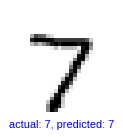

In [19]:
i = 0
plt.figure(figsize=(3,2))
plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel('actual: %i, predicted: %i'%(y_test[i],predicted_label[i]),color='blue')
plt.show()

